In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [161]:
lines_sentiment = pd.read_csv("/Users/naomigong/Coding/Movie_Character_Project/sentiment_analysis/line_sentiment.csv")
lines_sentiment.columns
lines_sentiment = lines_sentiment[["text", "sentiment", "confidence"]]

(array([   92.,  1150.,  3598.,  5427.,  7060.,  8303.,  8739., 10153.,
        10427.,  9467.,  9751.,  8874.,  9944.,  9072., 10582., 11127.,
        11318., 14664., 18865., 31756.]),
 array([0.0839344 , 0.12942715, 0.17491991, 0.22041266, 0.26590542,
        0.31139817, 0.35689093, 0.40238368, 0.44787644, 0.49336919,
        0.53886195, 0.5843547 , 0.62984746, 0.67534021, 0.72083296,
        0.76632572, 0.81181847, 0.85731123, 0.90280398, 0.94829674,
        0.99378949]),
 <BarContainer object of 20 artists>)

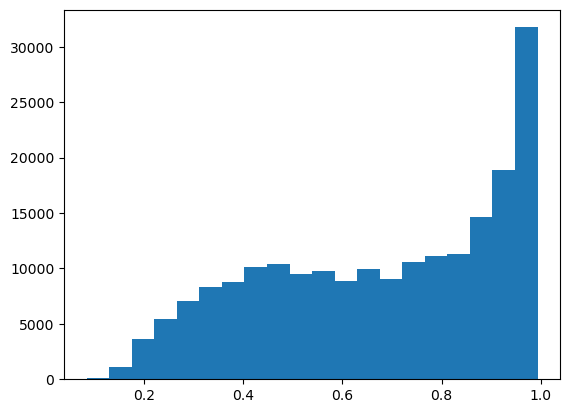

In [162]:
#plot 
confidence = lines_sentiment["confidence"]
confidences = confidence.values
fig, ax = plt.subplots()

ax.hist(confidences, bins = 20)


In [163]:
lines_sentiment = lines_sentiment[lines_sentiment["confidence"] >= 0.90]
lines_sentiment

,text,sentiment,confidence
0,They do not!,anger,0.985918
1,They do to!,anger,0.987566
4,Let's go.,impatient,0.983746
5,Wow,surprise,0.989840
9,What good stuff?,surprise,0.976509
...,...,...,...
200358,Franz! Help! Lunatic!,joy,0.913058
200361,Foooooood!,surprise,0.984757
200365,Food!!,joy,0.920127
200366,Do you have a reservation?,curious,0.917601


(array([1489., 1518., 1663., 1832., 1731., 1818., 2084., 1979., 2426.,
        2415., 2458., 2523., 2987., 3319., 3408., 3457., 3991., 4397.,
        4129., 1872.]),
 array([0.90000206, 0.90469143, 0.90938081, 0.91407018, 0.91875955,
        0.92344892, 0.92813829, 0.93282766, 0.93751704, 0.94220641,
        0.94689578, 0.95158515, 0.95627452, 0.96096389, 0.96565326,
        0.97034264, 0.97503201, 0.97972138, 0.98441075, 0.98910012,
        0.99378949]),
 <BarContainer object of 20 artists>)

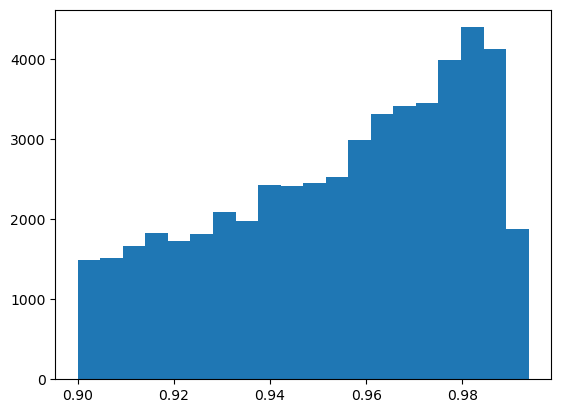

In [164]:
plt.hist(lines_sentiment["confidence"].values, bins = 20)

In [165]:
lines_sentiment.drop(columns=["confidence"], inplace=True)
lines_sentiment

,text,sentiment
0,They do not!,anger
1,They do to!,anger
4,Let's go.,impatient
5,Wow,surprise
9,What good stuff?,surprise
...,...,...
200358,Franz! Help! Lunatic!,joy
200361,Foooooood!,surprise
200365,Food!!,joy
200366,Do you have a reservation?,curious


In [166]:
sentiment_counts = lines_sentiment["sentiment"].value_counts()
sentiment_counts

sentiment
cheeky        9309
surprise      7832
curious       5752
whiny         5281
suspicious    4401
empathetic    3464
joy           3263
anger         2475
neutral       2421
think         1410
impatient     1357
confuse       1144
grumpy         876
love           771
sadness        684
fear           605
serious        265
disgust         88
guilty          80
energetic       18
Name: count, dtype: int64

In [167]:
sentiment_counts.values

array([9309, 7832, 5752, 5281, 4401, 3464, 3263, 2475, 2421, 1410, 1357,
       1144,  876,  771,  684,  605,  265,   88,   80,   18])

In [168]:
sentiment_counts.index

Index(['cheeky', 'surprise', 'curious', 'whiny', 'suspicious', 'empathetic',
       'joy', 'anger', 'neutral', 'think', 'impatient', 'confuse', 'grumpy',
       'love', 'sadness', 'fear', 'serious', 'disgust', 'guilty', 'energetic'],
      dtype='object', name='sentiment')

In [169]:
over_thousand = sentiment_counts[sentiment_counts > 1000]
print(over_thousand.index.tolist())


['cheeky', 'surprise', 'curious', 'whiny', 'suspicious', 'empathetic', 'joy', 'anger', 'neutral', 'think', 'impatient', 'confuse']


In [170]:
#eliminate the sentiments with smaller values
lines_sentiment = lines_sentiment[lines_sentiment['sentiment'].isin(over_thousand.index)]


In [171]:
text = lines_sentiment["text"]
sentiment = lines_sentiment["sentiment"]

In [172]:
# Correct way:
from sklearn.model_selection import train_test_split

X_train_features, X_test_features, Y_train, Y_test = train_test_split(
    text, sentiment, test_size=0.2, random_state=42
)


In [173]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

In [174]:
#fit builds the vocabulary space, then transforms applies the embeddings of that vocabulary space
X_train_features = feature_extraction.fit_transform(X_train_features)
X_test_features = feature_extraction.transform(X_test_features)

In [175]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',   # use softmax-based multiclass
    solver='lbfgs',              # required for 'multinomial'
    max_iter=1000
)

model.fit(X_train_features, Y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [176]:
y_pred_test = model.predict(X_test_features)
y_pred_train  = model.predict(X_train_features)
train_score = accuracy_score(Y_train, y_pred_train)
print(f"The training accuracy score is {train_score}")
test_score = accuracy_score(Y_test, y_pred_test)
print(f"The training accuracy score is {test_score}")

The training accuracy score is 0.6473094811234963
The training accuracy score is 0.5142382041155685
